In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from scipy.stats import gmean

# Load your dataset
df = pd.read_csv('weather.csv')

# Define features (x) and target variable (y)
y = df['weather']
columns_to_drop = ['weather', 'date']
x = df.drop(columns=columns_to_drop, axis=1)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Shuffle the data (optional but recommended)
x, y = shuffle(x, y, random_state=42)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Reshape the data for LSTM
x_train_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
x_test_reshaped = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))

# Create LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])))
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on training set
y_train_pred = np.argmax(model.predict(x_train_reshaped), axis=1)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
recall_train = recall_score(y_train, y_train_pred, average='weighted', zero_division=1)
f1_train = f1_score(y_train, y_train_pred, average='weighted', zero_division=1)
gmean_train = gmean([precision_train, recall_train])

# Evaluate the model on test set
y_test_pred = np.argmax(model.predict(x_test_reshaped), axis=1)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted', zero_division=1)
recall_test = recall_score(y_test, y_test_pred, average='weighted', zero_division=1)
f1_test = f1_score(y_test, y_test_pred, average='weighted', zero_division=1)
gmean_test = gmean([precision_test, recall_test])

# Print results
print(f'Training Accuracy: {accuracy_train:.4f}')
print(f'Test Accuracy: {accuracy_test:.4f}')

print(f'Training Precision: {precision_train:.4f}')
print(f'Test Precision: {precision_test:.4f}')

print(f'Training Recall: {recall_train:.4f}')
print(f'Test Recall: {recall_test:.4f}')

print(f'Training F1 Score: {f1_train:.4f}')
print(f'Test F1 Score: {f1_test:.4f}')

print(f'Training G-Mean: {gmean_train:.4f}')
print(f'Test G-Mean: {gmean_test:.4f}')


Epoch 1/10
33/33 [==============================] - 1s 6ms/step - loss: 1.5664 - accuracy: 0.4044 - val_loss: 1.4952 - val_accuracy: 0.6410
Epoch 2/10
33/33 [==============================] - 0s 1ms/step - loss: 1.4429 - accuracy: 0.6441 - val_loss: 1.3587 - val_accuracy: 0.6496
Epoch 3/10
33/33 [==============================] - 0s 951us/step - loss: 1.3062 - accuracy: 0.6556 - val_loss: 1.2100 - val_accuracy: 0.6496
Epoch 4/10
33/33 [==============================] - 0s 951us/step - loss: 1.1678 - accuracy: 0.6613 - val_loss: 1.0739 - val_accuracy: 0.6667
Epoch 5/10
33/33 [==============================] - 0s 995us/step - loss: 1.0547 - accuracy: 0.6717 - val_loss: 0.9745 - val_accuracy: 0.6838
Epoch 6/10
33/33 [==============================] - 0s 996us/step - loss: 0.9752 - accuracy: 0.6870 - val_loss: 0.9117 - val_accuracy: 0.7009
Epoch 7/10
33/33 [==============================] - 0s 951us/step - loss: 0.9192 - accuracy: 0.7012 - val_loss: 0.8691 - val_accuracy: 0.6923
Epoch 8/10


Confusion Matrix - Training Set:
[[  0   0   3   0  45]
 [  0   0   8   0  74]
 [  0   0 418   0 104]
 [  0   0  18   0   1]
 [  0   0  38   0 459]]

Confusion Matrix - Test Set:
[[  0   0   0   0   5]
 [  0   0   3   0  16]
 [  0   0  94   0  25]
 [  0   0   7   0   0]
 [  0   0  12   0 131]]


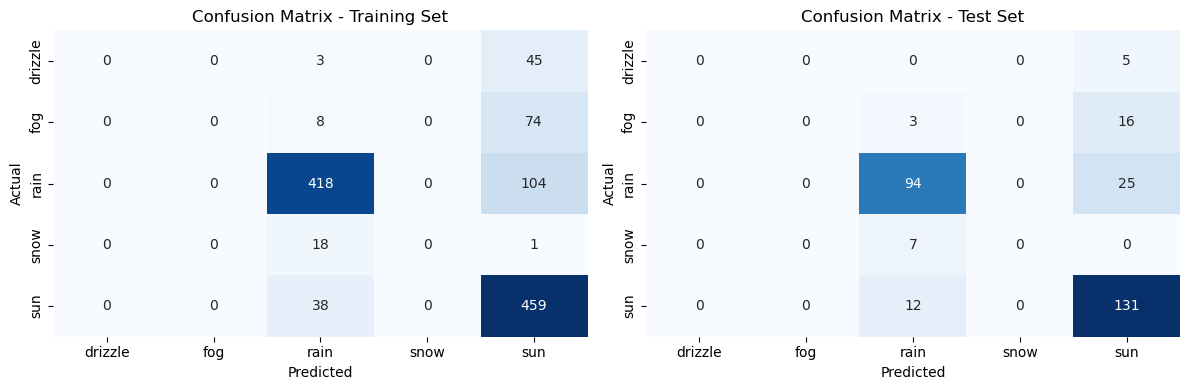

In [10]:
# Confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print confusion matrices
print('\nConfusion Matrix - Training Set:')
print(conf_matrix_train)

print('\nConfusion Matrix - Test Set:')
print(conf_matrix_test)

# Plot confusion matrices
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
